# Final LF

This is my final attempt at generating a luminosity function using a semi-analytic method.

The general problem to be solved is that we have two random variables $X$ and $Y$ distributed normally and lognormally respectively. We have a third random variable that is given by $Z = f(X,Y)$ where f is an arbitrary function (the isochrone relation). We want to know how $Z$ is distributed. This can be done via a monte-carlo simulation or potentially by some semi-analytic method however past trials have shown the monte-carlo and SA methods differ in result. They are very similar but there is a noticeable difference in the exponential background.

The method being trialed in this notebook will be different to the two method already trialed. We will call the final LF $p(M)$ and this is given by $\frac{dP(M)}{dM}$ where $P(M)$ is the CDF of $Z$. This CDF is given by $P(M^*) = \int\int_{D_{M^*}}p(m)p(z) dm dz$. $D_{M^*}$ is any $M \leq M^*$ 

In [22]:
%load_ext autoreload
%autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from Iso import Isochrone, chabrier, MDF
import sys
sys.path.insert(1, '../T1')
import reconstruct
import fitting

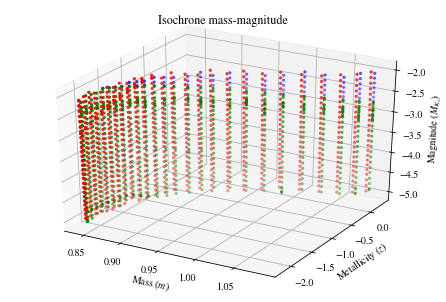

In [24]:
iso = Isochrone()

# This function represents the CDF of magnitude
def P(M):
    local_df = iso.df[iso.df.Kmag<=M]
    # Should return the above integral under the scatter plot of local_df
    # But I cannot figure out how this should be done
    #
    # The PDFs for mass and metallicity are the functions chabrier and MDF
    # respectively
    iso.plot(local_df)
P_V = np.vectorize(P)

P(-2.0)

# lowercase p represents the PDF of magnitude
def calc_p(x):
    Ps = P_V(x)
    P_spl = UnivariateSpline(x, Ps)
    p_spl = P_spl.derivative()
    ps = np.array([p_spl(i) for i in x])
    return ps

def plot_p(x, ps):
    plt.figure()
    plt.plot(x, ps, color="blue")
    plt.xlabel("$M_{K_s}$")
    plt.ylabel("Luminosity Function (Arbitrary Units)")

x = np.linspace(-3.5, 1.0, 1000)
#plot_p(x, calc_p(x))

plt.show()

## Monte-Carlo Simulation

The following code block presents the results of my latest monte-carlo simulation for comparison.

In [20]:
bcs, counts = reconstruct.reconstruct_LF("/users/alex/Data/MagSamples/SampledMags.npy", 200)

print("Gaussian Fit\n")

# Plot the histogram bins as points on a scatter plot
plt.scatter(bcs, counts, marker="+", color="black", s=20, alpha=0.5)

# Calls the fit_data routine in fitting.py which is quite involved
# This one is for fitting gaussians
fitting.fit_data(bcs, counts)

plt.figure()
plt.xlabel("$M_{K_s}$")
plt.ylabel("Luminosity Function (Arbitrary Units)")

# The same thing again for the skew fit
plt.scatter(bcs, counts, marker="+", color="black", s=20, alpha=0.5)

print("\nSkew Fit\n")
fitting.fit_data_skew(bcs, counts)
print("Disregard uncertainties for now.")
plt.show()

Gaussian Fit

Fitted Parameters:
Parameter 1: 0.0424 ± 0.004 (9.02%)
Parameter 2: -2.8621 ± 0.008 (-0.29%)
Parameter 3: 0.0467 ± 0.005 (11.4%)
Parameter 4: 1.1025 ± 0.005 (0.48%)
Parameter 5: -1.5113 ± 0.0004 (-0.03%)
Parameter 6: 0.0672 ± 0.0007 (1.0%)
Parameter 7: 0.131 ± 0.002 (1.47%)
Parameter 8: -1.1027 ± 0.003 (-0.25%)
Parameter 9: 0.1789 ± 0.005 (2.8%)
Parameter 10: 0.1073 ± 0.0008 (0.73%)
Parameter 11: 0.1027 ± 0.001 (1.28%)

Skew Fit

Fitted Parameters:
Parameter 1: 0.0269 ± 0.009 (32.42%)
Parameter 2: -2.6471 ± 0.06 (-2.42%)
Parameter 3: 0.5966 ± 0.3 (42.52%)
Parameter 4: -5.6665 ± 0.6 (-9.72%)
Parameter 5: 0.7624 ± 0.007 (0.95%)
Parameter 6: -1.4591 ± 0.002 (-0.11%)
Parameter 7: 0.0849 ± 0.001 (1.15%)
Parameter 8: -19.282 ± 0.07 (-0.35%)
Parameter 9: 0.0813 ± 0.003 (3.56%)
Parameter 10: -0.8574 ± 0.01 (-1.67%)
Parameter 11: 0.7441 ± 0.05 (6.35%)
Parameter 12: -8.3951 ± 0.07 (-0.83%)
Parameter 13: 0.1281 ± 0.002 (1.36%)
Parameter 14: 0.0684 ± 0.003 (3.71%)
Disregard uncertain